## Simulation of the Higgs' boson detection experiment

See: http://www.sciencedirect.com/science/article/pii/S037026931200857X

Physics Letters B
      Volume 716, Issue 1, 17 September 2012, Pages 1-29

The following code produces a distribution of events that 
__qualitatively__ reproduces the values in Figure 4 of the above
paper. It is not base on any actual physics but can be used
for the purposes of this course to emulate the kind of distribution
resulting from the experiment

0.007609023301332055 0.0013715501117754442 1
0.00038382662148509454 3.292779694069555e-05 2
2.050891440145428e-05 7.819179211804294e-07 3
7.207306314048686e-07 1.8398208147964893e-09 4
1.1187000200396901e-06 5.998364759493551e-08 5
3.659181070777301e-10 7.978675301598177e-16 6


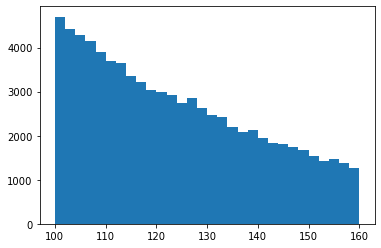

In [123]:
#calculation of the expected significance with the chi^2 test:
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np

#definition of higgs mass
mH= 126.5

#Define the total number of data, number of years and samples
Ntot = 80000
Nbg = int(Ntot*0.995)
Ns = int(Ntot*0.005)
Nyears=7
Nsamples=500

# Mdefinition of paramenters in the distributions
tau= 0.0218
min= 100
max= 160
bins=int((max-min)/2)

#definition of the distributions
bg_dist= sp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau)
sig_dist= sp.norm(loc=mH,scale=2)
# Rate

#we calculate p-values after certain number of years
for n in range(1,Nyears):
    p_values=[]
#we make multiple iterations to calculate averages
     for k in range(Nsamples):
        obs=[]
        exp=[]
#for every year we generate a distribution with N elements and combine them together to calculate p-value
        for j in range(n):

#generation of the distributions
            bg_points= bg_dist.rvs(Nbg)
            sig_points= sig_dist.rvs(Ns)

# Join background and signal in a single sample
            all_points= np.concatenate( (bg_points,sig_points) )

#we create exponential distribution which we'll use as background
            x=bg_dist.rvs(Ntot)
#create histograms of the samples
            counts= np.histogram(all_points,bins)
            counts_2= np.histogram(x,bins)

#apply the test
            for i in range(bins):
                obs.append(counts[0][i])
                exp.append(counts_2[0][i])
            c2_stat, p_val = sp.chisquare(exp,obs)
#the list contains p-value after 1 year, 2 years, etc...
        p_values.append(p_val)

           
    print(sum(p_values)/len(p_values),np.var(p_values),n)
_= plt.hist(all_points,bins)

0.007989085823974616 0.0015171533094021498 1
23.369999999999997
0.0017782941421643596 0.0002575984450896342 2
49.296
0.0004364052809474468 6.902458265824798e-05 3
72.824
7.464313369971734e-05 6.3718007343016446e-06 4
87.388
1.1650596142184523e-05 3.698014484108575e-07 5
95.004
3.2733312179280573e-06 5.727423418778417e-08 6
98.346
2.4139710545332765e-07 4.250851689868309e-10 7
99.47


Text(0, 0.5, 'Counts')

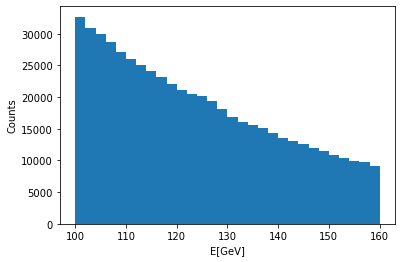

In [127]:
#here we make the same thing but calculate the number of p-values below 5 sigma for every number of years
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np

mH= 126.5
tau= 0.0218
min= 100
max= 160
bins=int((max-min)/2)
bg_dist= sp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau)
sig_dist= sp.norm(loc=mH,scale=2)
Nyears=8
Nsamples=500

for n in range(1,Nyears):
#what we modify is the number of measurements per year
    nok=0
    Ntot = 80000*n
    Nbg = int(Ntot*0.995)
    Ns = int(Ntot*0.005)
   
    p_values=[]
#the procedure for running the test is the same
    for k in range(Nsamples):
        obs=[]
        exp=[]

        bg_points= bg_dist.rvs(Nbg)
        sig_points= sig_dist.rvs(Ns)

        all_points= np.concatenate( (bg_points,sig_points) )

        x=bg_dist.rvs(Ntot)
        counts= np.histogram(all_points,bins)
        counts_2= np.histogram(x,bins)

        for i in range(bins):
            obs.append(counts[0][i])
            exp.append(counts_2[0][i])

        c2_stat, p_val = sp.chisquare(exp,obs)
#we check wether the p-val is below the number we want, and count them
        if p_val <= 2.9*10**-7:
            nok=nok+1
        p_values.append(p_val)

    print(sum(p_values)/len(p_values),np.var(p_values),n)
    print(nok/Nsamples*100)




0.008173442973923965 1
23.512
50000


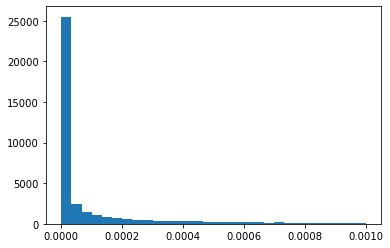

In [114]:
#this is a similar code as the one above to calculate various p-values after one year 
#in order to make a graphical representation
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np

mH= 126.5
tau= 0.0218
min= 100
max= 160
bins=int((max-min)/2)
bg_dist= sp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau)
sig_dist= sp.norm(loc=mH,scale=2)
Nyears=2
Nsamples=5000

for n in range(1,Nyears):
    nok=0
    Ntot = 80000*n
    Nbg = int(Ntot*0.995)
    Ns = int(Ntot*0.005)
    p_values=[]
    for k in range(Nsamples):
        obs=[]
        exp=[]
        bg_points= bg_dist.rvs(Nbg)
        sig_points= sig_dist.rvs(Ns)
        all_points= np.concatenate( (bg_points,sig_points) )

        x=bg_dist.rvs(Ntot)
        counts= np.histogram(all_points,bins)
        counts_2= np.histogram(x,bins)

        for i in range(bins):
            obs.append(counts[0][i])
            exp.append(counts_2[0][i])

        c2_stat, p_val = sp.chisquare(exp,obs)
        if p_val <= 2.9*10**-7:
            nok=nok+1
        p_values.append(p_val)

    print(sum(p_values)/len(p_values),n)
    print(nok/Nsamples*100)
print(len(p_values))
_= plt.hist(p_values,bins,range=[0,0.001])
#as we can see the graph is not very conclusive, we don't know how the numbers are distributed around the zero

50000 0.008173442973923965 0.0015715213152821877


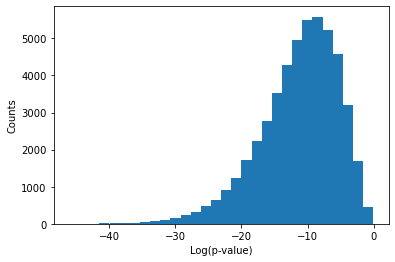

In [120]:
#to solve it we make a logarithmic representation of the above result
p_log=[]

for i in range(0,50000):
    p_log.append(np.log(p_values[i]))

_= plt.hist(p_log,bins)
plt.xlabel("Log(p-value)")
plt.ylabel("Counts")
avg_p=sum(p_values)/len(p_values)
var_p=(sum((x-avg_p)**2 for x in p_values)/len(p_values))
var=np.sqrt(np.var(p_values))
print(len(p_values),avg_p,var_p)

1000


0.3250180612265025 0.06584737281120404 1
0.19687343934773058 0.040530605608332354 1
0.14437611486024432 0.023888681354266597 1
0.08782202934782136 0.015048662483833656 1
0.05516057481865542 0.005454678911963955 1
0.03721095999793469 0.0028229777527072706 1
0.025986795072319945 0.0017981855402707126 1
0.016804033927294175 0.0010436145904205848 1
0.01315785087537633 0.00045319334622776717 1
0.008477970644006107 0.0005287954935606258 1
0.00616073387630062 0.0002086761363608682 1
0.003234115772313265 6.465620093927993e-05 1
0.0025871806921863856 7.50741330996682e-05 1
0.0018846216535462561 3.179708357870666e-05 1
0.0017317638299296804 2.69830970545839e-05 1
0.0009134300321250364 4.998388161607058e-06 1
0.0005817020739741501 2.268450299502616e-06 1
0.0004151175317191847 1.2082341351898262e-06 1
0.0003682284887330195 1.411177092932295e-06 1


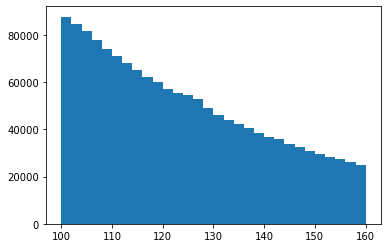

In [151]:
#the same code as the first cell but running the kolmogorov-smirnov test instead

%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np

mH= 126.5
for u in range(1,20):
    Ntot = 80000*u
    Nbg = int(Ntot*0.995)
    Ns = int(Ntot*0.005)
    Nyears=2
    Nsamples=200

    tau= 0.0218
    min= 100
    max= 160
    bins=int((max-min)/2)
    bg_dist= sp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau)
    sig_dist= sp.norm(loc=mH,scale=2)

    for n in range(1,Nyears):
        p_values=[]

        for k in range(Nsamples):

            obs=[]
            exp=[]
            for j in range(n):
                bg_points= bg_dist.rvs(Nbg)
                sig_points= sig_dist.rvs(Ns)
                all_points= np.concatenate( (bg_points,sig_points) )
                x=bg_dist.rvs(Ntot)
                counts= np.histogram(all_points,bins)
                counts_2= np.histogram(x,bins)
                
#the main difference is that we compare the samples directly, we don't use the histograms
                D_value,p_val= sp.ks_2samp(all_points,x)
            p_values.append(p_val)

        print(sum(p_values)/len(p_values),np.var(p_values),n)
_= plt.hist(all_points,bins)

0.05331739451359373 0.00611588357666115 5
0.3
0.008590088927192424 0.00031538300065740233 10
1.7000000000000002
0.0011989962398819493 1.0064733543583515e-05 15
9.4
0.00022193182010259998 5.447277121633683e-07 20
22.5
3.740731712419263e-05 4.3284919006523554e-08 25
44.5
5.552382159402435e-06 7.314050626413576e-10 30
64.60000000000001
1.3993073013067759e-06 6.769660941220534e-11 35
78.2
2.0512482376220818e-07 1.547013932399186e-12 40
92.5
3.30134251547656e-08 6.726330941484302e-14 45
97.7


Text(0, 0.5, 'Counts')

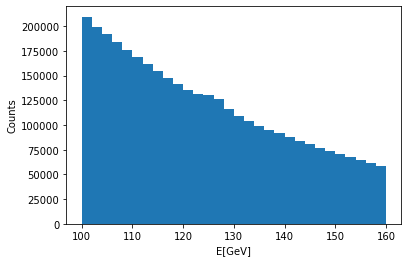

In [156]:
#the same code used when computing the percentage of p-values below 5 sigma, but using the K-S test.

%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np

mH= 126.5
tau= 0.0218
min= 100
max= 160
bins=int((max-min)/2)
bg_dist= sp.truncexpon(b=(max-min)*tau, loc=min, scale=1./tau)
sig_dist= sp.norm(loc=mH,scale=2)
Nyears=10
Nsamples=100
for n in range(1,Nyears):

    nok=0
    Ntot = 80000*5*n
    Nbg = int(Ntot*0.995)
    Ns = int(Ntot*0.005)

    p_values=[]
    for k in range(Nsamples):

        bg_points= bg_dist.rvs(Nbg)

        sig_points= sig_dist.rvs(Ns)

        all_points= np.concatenate( (bg_points,sig_points) )

        x=bg_dist.rvs(Ntot)

        c2_stat, p_val = sp.ks_2samp(all_points,x)
        if p_val <= 2.9*10**-7:
            nok=nok+1
        p_values.append(p_val)

    print(sum(p_values)/len(p_values),np.var(p_values),5*n)
    print(nok/Nsamples*100)
